**In our daily lives we view many products and review them if we like or dislike the same on vaious platforms like the Amazon, 
Flipkart and many more. These reviews extraction helps the platform to check the sentiments attached to the product and the 
ratings help the brands to pitch in the product for various offers they can offer depending on the popularity**

**In this notebook/ code we will try to extract the reviews from Amazon and try to checke the sentiment analysis for the same 
and frequency distribution and other NLP techniques for the analysis.**

In [1]:
# let us start with importing the dependencies for the analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from bs4 import BeautifulSoup as bs
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# We will now extract the reviews for a particular product from "Amazon.in",
# say for "Iphone 12" (ideally selecting the product with more reviews)

# creating an empty list
ipr = []

'''defining a for loop to extract reviews from the amazon page for "Iphone12"
    for 20 pages. Say one page has 10 reviews, we will be able to extract 200 reviews'''
for i in range(1,21):
    ip = []
    url = "https://www.amazon.in/Apple-iPhone-13-256GB-Product/product-reviews/B09G9HDN4Q/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url) # getting the url and helping extract reviews from it
    soup = bs(response.content, "html.parser") #help extract the url from html
    reviews = soup.find_all("span", attrs = {"class", "a-size-base review-text review-text-content"}) # helps extract the particular data from the mentioned tags in the html code
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    # this helps extract the reviews to go page by page and extract them by appending them
    ipr = ipr + ip 

In [3]:
# checking the extracted text
ipr

['\n\n  This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone\n\n',
 '\n\n  You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂\n\n',
 "\n\n  Iphone 13(blue), Outlook looks good but not attractive, looks dim. After usage of 20min, I can see fingerprints all over the phone. Cinematic video features looks great, can't use Iphone 13 charging cable with other iphone adapters. Finally my first iPhone experience is average.\n\n",
 '\n\n  There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam\n\n',
 "\n\n  Ignore the negative comments made by amateurs.Reasons for upgra

In [4]:
txt = pd.DataFrame(ipr)
txt["text"] = txt
txt

,0,text
0,\n\n This product is duplicate of iPhone 12 o...,\n\n This product is duplicate of iPhone 12 o...
1,\n\n You should be a bigggggg bot to buy this...,\n\n You should be a bigggggg bot to buy this...
2,"\n\n Iphone 13(blue), Outlook looks good but ...","\n\n Iphone 13(blue), Outlook looks good but ..."
3,\n\n There was a hairline scratch on the scre...,\n\n There was a hairline scratch on the scre...
4,\n\n Ignore the negative comments made by ama...,\n\n Ignore the negative comments made by ama...
...,...,...
81,"\n\n SLIGHT speed difference, more batter bac...","\n\n SLIGHT speed difference, more batter bac..."
82,,
83,\n\n The smartphone marketplace has changed d...,\n\n The smartphone marketplace has changed d...
84,\n\n I switched from OnePlus 6T to iPhone 13....,\n\n I switched from OnePlus 6T to iPhone 13....


**The text as is from the extraction is filled with unwanted texts, stop words, punctuation marks, etc. to clean these off
we need to define a function to help do the job for us**

In [5]:
import re # importing Regular Experession "re"
nltk.download('stopwords') # downloading the stopwords
stemmer = nltk.SnowballStemmer("english") # defining the stemmer for the text to be done
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english")) # selecting the english stopwords from the list of various languages present

# defining the cleaning the text function for the extracted text
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

# Post running the defined function we invoke the same for the text extracted
txt["text"] = txt["text"].apply(clean)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bikem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Joining the cleansed text data into a single paragraph
text = " ".join(i for i in txt.text)
text

"  product duplic iphon  camera design chang low qualiti product buy samsung mobil phone   bigggggg bot buy phoneyou could get iphon  pro that best 😂   iphon  outlook look good attract look dim usag  see fingerprint phone cinemat video featur look great cant use iphon  charg cabl iphon adapt final first iphon experi averag   hairlin scratch screen clear visibl direct tri contact amazon replac ask us connect appl connect appl ask connect amazon blame game begin end pay price awful servic go tag social media amazon appl big scam   ignor negat comment made amateursreason upgrad  camera bigger camera apertur oi cinemat mode low light pictur outstand see  pictur flower taken night also pictur daylight  batteri appl realli done good job batteri manag give good batteri back  processor new  processor better  softwar usual strong point iphon  storag forget you'r get  gig base storag compar  gig last year base model pricewho buy  your alreadi use iphon  dont bother upgrad wait next year  use iph

In [7]:
# using the Vader_lexicon library to run the sentiment analysis on the text extracted and cleansed

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
txt["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in txt["text"]] # defining the positive polarity for the text
txt["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in txt["text"]] # defining the nagetive polarity for the text
txt["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in txt["text"]] # defining the neutral polarity for the text
txt = txt[["text", "Positive", "Negative", "Neutral"]]
print(txt.head())

                                                text  Positive  Negative  \
0    product duplic iphon  camera design chang lo...     0.000     0.149   
1    bigggggg bot buy phoneyou could get iphon  p...     0.318     0.000   
2    iphon  outlook look good attract look dim us...     0.275     0.000   
3    hairlin scratch screen clear visibl direct t...     0.170     0.232   
4    ignor negat comment made amateursreason upgr...     0.139     0.038   

   Neutral  
0    0.851  
1    0.682  
2    0.725  
3    0.597  
4    0.823  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bikem\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
x = sum(txt["Positive"])
y = sum(txt["Negative"])
z = sum(txt["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [9]:
# printing the sentiment scores for the text
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  22.409000000000002
Negative:  3.290000000000001
Neutral:  56.30199999999999


In [10]:
ip_rev_string = " ".join(txt["text"])

In [11]:
ip_rev_string

"  product duplic iphon  camera design chang low qualiti product buy samsung mobil phone   bigggggg bot buy phoneyou could get iphon  pro that best 😂   iphon  outlook look good attract look dim usag  see fingerprint phone cinemat video featur look great cant use iphon  charg cabl iphon adapt final first iphon experi averag   hairlin scratch screen clear visibl direct tri contact amazon replac ask us connect appl connect appl ask connect amazon blame game begin end pay price awful servic go tag social media amazon appl big scam   ignor negat comment made amateursreason upgrad  camera bigger camera apertur oi cinemat mode low light pictur outstand see  pictur flower taken night also pictur daylight  batteri appl realli done good job batteri manag give good batteri back  processor new  processor better  softwar usual strong point iphon  storag forget you'r get  gig base storag compar  gig last year base model pricewho buy  your alreadi use iphon  dont bother upgrad wait next year  use iph

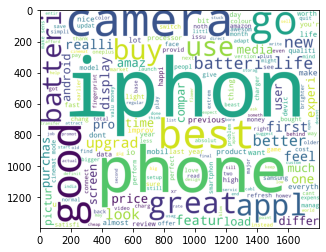

In [12]:
# Creating a wordcloud of the text extracted
wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)